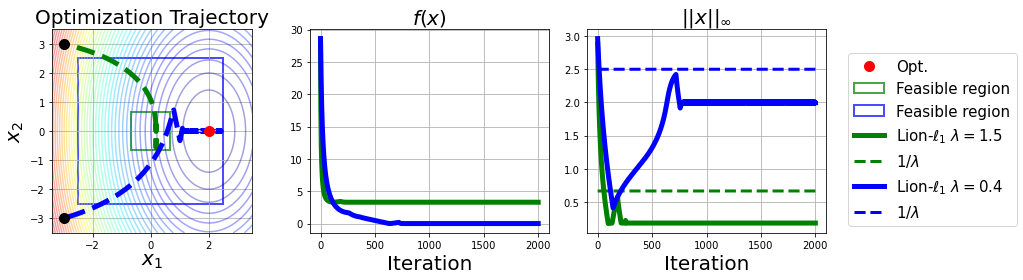

In [14]:

%reset -f
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import autograd.numpy as np
from autograd import grad
from math import pi

def loss_fn(theta):
    x, y = theta
    return (x - 2)**2 + y**2/2.5 #5

gradient_fn = grad(loss_fn)

theta0_1 = np.array([-3., 3])
theta0_2 = np.array([-3., -3])

optimal = np.array([2., 0.])
alpha = 0.01

fig, axs = plt.subplots(1, 3, figsize=(3*4, 4))


T = 600
beta1 = 0.9
beta2 = 0.99


def traj(lmd = 1.5, theta0 = theta0_1, T = 600):
    trajectory_simple = []
    losses_simple = []
    phi_sample = []

    theta_simple = theta0
    m = np.array([0.0, 0.0])

    for t in range(T): # theta_simple is for Lion
        losses_simple.append(loss_fn(theta_simple))
        grad = gradient_fn(theta_simple)

        m = alpha/(1+alpha) * grad + 1/(1+alpha)*m
        d = (1-beta1)*grad + beta1*m
        eps = 0.1
        # print(abs(d) > eps)
        theta_simple = theta_simple - alpha*(np.sign(d) + lmd * theta_simple * (1e-8 + np.abs(grad)))
        # print("theta_simple", theta_simple)
        # print("grad", 1e-8 + np.abs(grad))
        # print("result", theta_simple / (1e-8 + np.abs(grad)))
        trajectory_simple.append(theta_simple)
        phi_sample.append(np.max(np.abs(theta_simple)))

    trajectory_simple = np.array(trajectory_simple)
    losses_simple = np.array(losses_simple)
    phi_sample = np.array(phi_sample)
    return trajectory_simple, losses_simple, phi_sample

lmd_1 = 1.5
lmd_2 = 0.4
trajectory_simple, losses_simple, phi_sample = traj(lmd = 1.5, T = 2000, theta0=theta0_1)
trajectory_simple_2, losses_simple_2, phi_sample_2 = traj(lmd = .4, theta0=theta0_2, T = 2000)



fontsize = 20
x = np.linspace(-3.4, 3.5, 100)
y = np.linspace(-3.5, 3.5, 100)
X, Y = np.meshgrid(x, y)
Z = loss_fn(np.array([X, Y]))

axs[0].contour(X, Y, Z, levels=50, cmap='jet', alpha=0.37)

axs[0].plot(trajectory_simple[:, 0], trajectory_simple[:, 1], 'g--', markersize=5,linewidth=5)
axs[0].plot(trajectory_simple_2[:, 0], trajectory_simple_2[:, 1], 'b--', markersize=5,linewidth=5)
# plot the optimal point
axs[0].plot(optimal[0], optimal[1], 'ro', markersize=10, label = 'Opt.')
# plot initial point
axs[0].plot(theta0_1[0], theta0_1[1], 'ko', markersize=10)
axs[0].plot(theta0_2[0], theta0_2[1], 'ko', markersize=10)
w = h = 2 / lmd_1
rectangle = patches.Rectangle((-w/2, -h/2), w, h, facecolor='none',edgecolor='g', alpha = 0.7, label='Feasible region', linewidth  = 2) # centered at (0,0)
axs[0].add_patch(rectangle)


w = h = 2 / lmd_2
rectangle = patches.Rectangle((-w/2, -h/2), w, h, facecolor='none',edgecolor='b', alpha = 0.7, label='Feasible region',  linewidth  = 2) # centered at (0,0)
axs[0].add_patch(rectangle)


axs[0].set_aspect('equal', 'box')

# axs[0].legend(fontsize=15,fancybox=True, framealpha=0.5)

axs[0].set_xlabel('$x_1$', fontsize=fontsize, labelpad=1)
axs[0].set_ylabel('$x_2$',fontsize=fontsize)
axs[0].set_title(f'Optimization Trajectory', fontsize=fontsize)
axs[0].grid(True)
#axs[0].legend(fontsize=18)

axs[1].plot(losses_simple, c='g', label = f'Lion-$\ell_{1}$ $\lambda = {lmd_1}$', linestyle='-', linewidth=5)
axs[1].plot(losses_simple, c='g', label = f'$1/\lambda$', linestyle='--', linewidth=3)
axs[1].plot(losses_simple_2, c='b', label = f'Lion-$\ell_{1}$ $\lambda = {lmd_2}$', linestyle='-', linewidth=5)
axs[1].plot(losses_simple_2, c='b', label = f'$1/\lambda$', linestyle='--', linewidth=3)

axs[1].set_xlabel('Iteration', fontsize=fontsize)
axs[1].grid(True)
# axs[1].legend(fontsize=fontsize)
# axs[1].set_yscale('log')
axs[1].set_title(f'$f(x)$', fontsize=fontsize)


axs[2].plot(phi_sample, c='g', label = f'Lion-$\ell_{1}$ $\lambda = {lmd_1}$', linestyle='-', linewidth=5)
axs[2].plot(np.ones_like(phi_sample)*(1 / lmd_1), c='g', label = f'$1/\lambda$', linestyle='--', linewidth=3)

axs[2].plot(phi_sample_2, c='b', label = f'Lion-$\ell_{1}$ $\lambda = {lmd_2}$', linestyle='-', linewidth=5)
axs[2].plot(np.ones_like(phi_sample_2)*(1 / lmd_2), c='b', label = f'$1/\lambda$', linestyle='--', linewidth=3)

axs[2].set_xlabel('Iteration', fontsize=fontsize)
#axs[2].legend(fontsize=18)
axs[2].grid(True)
axs[2].set_title(f'$||x||_\infty$', fontsize=fontsize)
#axs[2].set_yscale('log')


handles, labels = [], []
for ax in axs[:-1]:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        handles.append(handle)
        labels.append(label)

# Create a single combined legend for the figure
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)


plt.tight_layout()
# plt.savefig('sign_q2.pdf')
plt.show()